## Steps 
    1) Import all the libraries
    2) Read the data -fetch from SQL/Oracle/Hive tables etc
    3) Data Cleaning/Data Preprocessing:
            this is the step where we make our data ready for anlaysis
            i) Missing values
            ii) outliers
            iii) converting categorical variable into continuous variable
    4) EDA(Explorratory Data Analysis)/Data Visualization
            this is used to find out some insights from the data using visualization
            i) Univariant(one variable )
            ii) bivariant(two variable)
    5) ML Models :
            i) define/understand which column is your target variable/predictive variable
            ii) Split the data into 70:30 ratio 
                        70: 30 --> training and testing data respectively
            iii) Select the ML algorithm on the basis of the problem
                a) call ML algorithm
                b) fit on the training data
                c) predict on the testing data
     6) Evaluate your ML model on testing data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### Missing value 
        1) Remove 
        2) imputation

In [5]:
# missing value?
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## How to handle using imputation
## type of variable ---> continuous
### fill --> mean/median
##mean--> no outliers
##median --> outlier


C:\Users\roopagupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


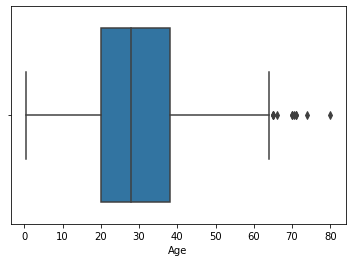

In [7]:
sns.boxplot(data['Age'])
plt.show()

In [8]:
## you have to fill the missing value with median not mean

data['Age'].fillna(data['Age'].median() , inplace = True)

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#data.shape : > 60% data is missing we use to remove
687/891

0.7710437710437711

In [11]:
147/891

0.16498316498316498

In [12]:
data['Cabin'].value_counts()# understand distribution of categorical variable

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

In [13]:
# drop the column Cabin because > 77% data is missing

data.drop(columns=['Cabin'] , axis =1 , inplace = True)

In [14]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
data['Embarked'].fillna(data['Embarked'].mode()[0] , inplace = True)

In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA


In [17]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
data['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

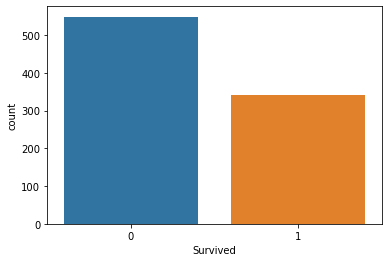

In [19]:
sns.countplot(x = 'Survived' , data = data)

## bivariant Analysis

<AxesSubplot:xlabel='Survived', ylabel='Age'>

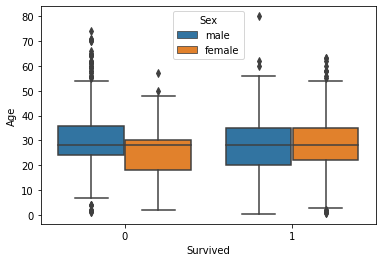

In [20]:
sns.boxplot(x ='Survived' , y = 'Age' ,hue = 'Sex', data = data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

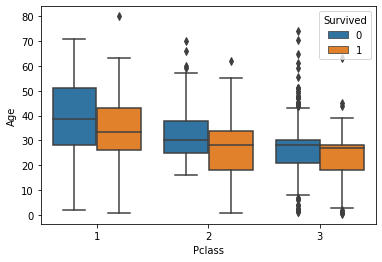

In [21]:
sns.boxplot(x ='Pclass' , y = 'Age' ,hue = 'Survived', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

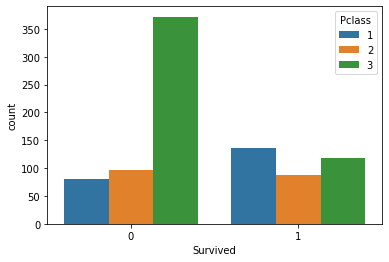

In [22]:
sns.countplot(x = 'Survived' , hue = 'Pclass' , data = data)

<AxesSubplot:>

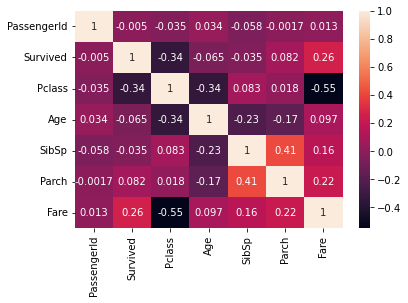

In [23]:
sns.heatmap(data.corr() , annot=True)

## how to handle categorical variable

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
data.drop(columns=['Name' ,'Ticket','PassengerId'] , inplace = True)

In [26]:
data2 = pd.get_dummies(data)
data2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00,1,0,7.2500,0,1,0,0,1
1,1,1,38.00,1,0,71.2833,1,0,1,0,0
2,1,3,26.00,0,0,7.9250,1,0,0,0,1
3,1,1,35.00,1,0,53.1000,1,0,0,0,1
4,0,3,35.00,0,0,8.0500,0,1,0,0,1
5,0,3,28.00,0,0,8.4583,0,1,0,1,0
6,0,1,54.00,0,0,51.8625,0,1,0,0,1
7,0,3,2.00,3,1,21.0750,0,1,0,0,1
8,1,3,27.00,0,2,11.1333,1,0,0,0,1
9,1,2,14.00,1,0,30.0708,1,0,1,0,0


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


## ML model .....
    5) ML Models :
            i) define/understand which column is your target variable/predictive variable
            ii) Split the data into 70:30 ratio 
                        70: 30 --> training and testing data respectively
            iii) Select the ML algorithm on the basis of the problem
                a) call ML algorithm
                b) fit on the training data
                c) predict on the testing data

In [28]:
y = data2['Survived']
x = data2.drop(columns= ['Survived'] , axis =1 )

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , stratify=y , 
                                        test_size = 0.3 , random_state= 42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
ls = LogisticRegression()
ls.fit(x_train , y_train)
pred = ls.predict(x_test)
pred

C:\Users\roopagupta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [33]:
#x_test1 = x_test
#x_test1['pred'] = pred
#x_test1['actual_value'] = y_test
#x_test1

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 10)
(623,)
(268, 10)
(268,)


# Model Evaluation

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       165
           1       0.75      0.71      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

C:\Users\roopagupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


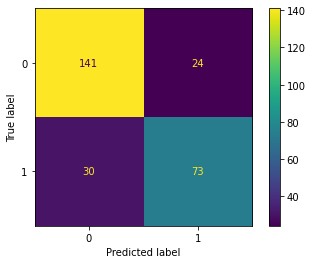

In [39]:
plot_confusion_matrix(ls, x_test , y_test)

In [40]:
from sklearn.metrics import recall_score , precision_score , accuracy_score , f1_score

In [41]:
print("accuracy" , accuracy_score(y_test , pred))
print("Recall" , recall_score(y_test , pred))
print("precision" , precision_score(y_test , pred))
print("F1-score" , f1_score(y_test , pred))

accuracy 0.7985074626865671
Recall 0.7087378640776699
precision 0.7525773195876289
F1-score 0.73
